# Second version authentic/ bootleg plush identifier

Just like the first version, I import all the neccesary libraries to make my project work. Since Jeremy Howard's Is it a bird? AI model tutorial uses the fastai library, I will be using that

In [1]:
import fastai
from fastai.vision.all import *
from fastcore.all import *

Since running the script causes warnings to pop up about deprecated code, I decided to hide those as the warnings take alot of space in the output log

In [2]:
import warnings
warnings.filterwarnings("ignore")

I specify the path to the folder I want the model to train on, in this case the folder "determine_character" with images of specific characters. This is for first determining which character a plush is.

Afterwards, I create a DataLoader that contains a training (for training the model) and validation set (to check the model's accuracy). To preview the model's capabilities, a DataBlock is also created with several parameters:
- Inputs the images as categories (which are the character's names)
- Gets all the images in the folders
- Splits the data in training and validation sets randomly, with 20% of the data being used for the latter
- Get the name of the folders that the images are in
- Resize the images in 224x224 px by squishing it

Lastly, a DataBlock with 6 images is created with the labels above it

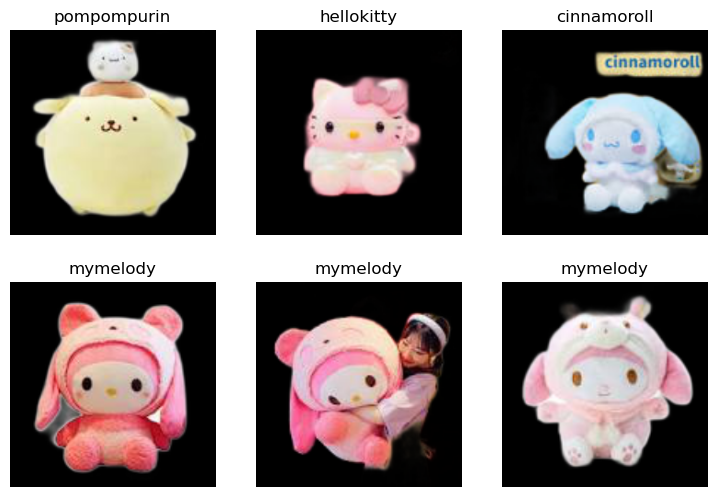

In [4]:
path = Path('determine_character')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

To train the model, I use ResNet50 which is a widely used vision model. 
Finally, the trained model is finetuned using fastai's method fine_tune() which applies the best pracitices for it. I specify the amount of finetuning at 3, as one session typically takes around 5 minutes.

In [5]:
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(3)
#second version / determining character
#finetuning after removing backgrounds

epoch,train_loss,valid_loss,accuracy,time
0,1.123639,0.267174,0.912500,05:33


epoch,train_loss,valid_loss,accuracy,time
0,0.164713,0.319236,0.918750,06:37
1,0.155958,0.244295,0.912500,06:29
2,0.122083,0.212286,0.937500,06:32


The file name of the image that will be used to determine the character and authenticity

In [125]:
fname='test images/bootleg/14.png'

The model predicts the character in the image and calculates the probability of the answer being correct

If the character is determined for which_char, an if-statement will be executed that will create a new DataLoader and DataBlock for that specific character. The data comes from the second data set 'determine_real_or_fake', which is used for determining the authenticity of the plush. The data set contains folders for specific characters, with images divided in 'authentic' and 'bootleg' plushies

This is a: rilakkuma.
Probability rate: 0.0000


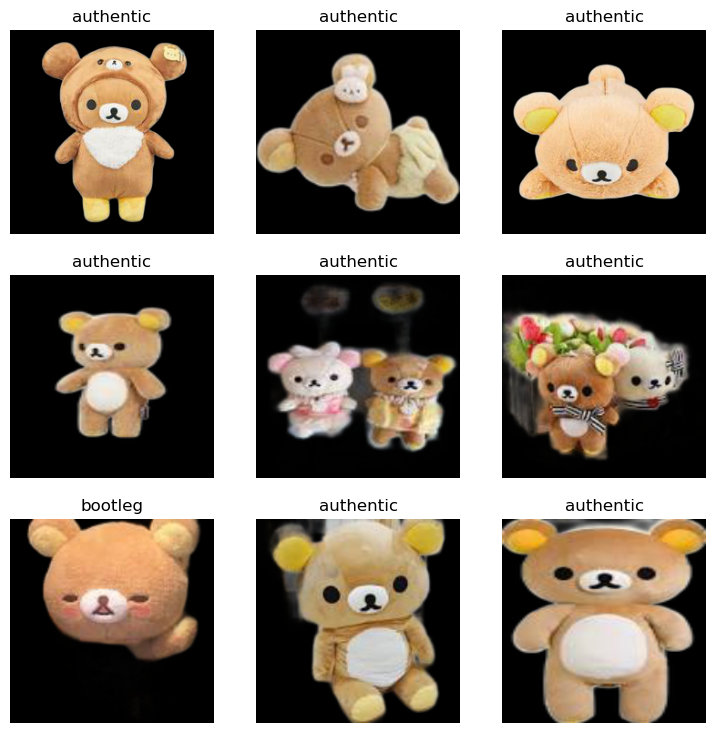

In [122]:
which_char,_,probs = learn.predict(fname)
print(f"This is a: {which_char}.")
print(f"Probability rate: {probs[0]:.4f}")

if which_char == 'pompompurin':
    pathAuth = Path('determine_real_or_fake\pompompurin')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(192, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)
    
    
if which_char == 'hellokitty':
    pathAuth = Path('determine_real_or_fake\hellokitty')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)
    
if which_char == 'mymelody':
    pathAuth = Path('determine_real_or_fake\mymelody')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)
    

if which_char == 'kuromi':
    pathAuth = Path('determine_real_or_fake\kuromi')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)
    
if which_char == 'cinnamoroll':
    pathAuth = Path('determine_real_or_fake\cinnamoroll')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)
    
if which_char == 'rilakkuma':
    pathAuth = Path('rilakkuma')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)
    
if which_char == 'korilakkuma':
    pathAuth = Path('determine_real_or_fake\korilakkuma')
    
    dlsAuth = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items=get_image_files, 
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='squish')]
    ).dataloaders(pathAuth, bs=32)
    
    dlsAuth.show_batch(max_n=9)

The same process of finetuning is also applied here. Since the data for each character is significally smaller, the finetuning process only takes around some seconds

In [123]:
learnAuth = vision_learner(dlsAuth, resnet50, metrics=accuracy)
learnAuth.fine_tune(3)
#second version / determining bootleg or authentic of a plush character
#finetuning after removing backgrounds

epoch,train_loss,valid_loss,accuracy,time
0,1.291570,0.878935,0.611111,00:17


epoch,train_loss,valid_loss,accuracy,time
0,0.536952,0.301039,0.888889,00:25
1,0.415106,0.533804,0.666667,00:25
2,0.425960,0.373203,0.888889,00:29


Finally, the authenticity of the plush is calculated and outputted along with the probability rate of the outcome being correct

In [126]:
is_authentic,_,probsAuth = learnAuth.predict(PILImage.create(fname))
print(f"This is a: {is_authentic}.")
print(f"Probability rate: {probsAuth[0]:.4f}")

This is a: bootleg.
Probability rate: 0.0369
